<a href="https://colab.research.google.com/github/vinilvadakkepurakkal/self-driving-car/blob/master/self_driving_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/vinilvadakkepurakkal/Track.git

fatal: destination path 'Track' already exists and is not an empty directory.


In [0]:
!ls


model.h5  sample_data  Track


In [0]:

!pip3 install imgaug

In [0]:
!ls Track

behaviour_cloning.ipynb  driving_log.csv  IMG  README.md


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Convolution2D, Flatten, MaxPooling2D
from imgaug import augmenters as iaa
import random
import cv2
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import ntpath

In [0]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns )
#data = pd.read_csv(('driving_log.csv'), names= columns )
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_588.jpg   
1  C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_692.jpg   
2  C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_792.jpg   
3  C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_894.jpg   
4  C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\center_2019_01_09_17_22_44_994.jpg   

                                                                                                left  \
0   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_588.jpg   
1   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_692.jpg   
2   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_792.jpg   
3   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_894.jpg   
4   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\left_2019_01_09_17_22_44_994.jpg   

                                                                                                right  \
0   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_588.jpg   
1   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_692.jpg   
2   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_792.jpg   
3   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_894.jpg   
4   C:\Users\vvadakk\Desktop\Self-Driving-car\Image\Image\Track\IMG\right_2019_01_09_17_22_44_994.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000078  
1  0.0       0.0       0.0      0.000079  
2  0.0       0.0       0.0      0.000080  
3  0.0       0.0       0.0      0.000079  
4  0.0       0.0       0.0      0.000078

In [0]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data.head()

center                              left  \
0  center_2019_01_09_17_22_44_588.jpg  left_2019_01_09_17_22_44_588.jpg   
1  center_2019_01_09_17_22_44_692.jpg  left_2019_01_09_17_22_44_692.jpg   
2  center_2019_01_09_17_22_44_792.jpg  left_2019_01_09_17_22_44_792.jpg   
3  center_2019_01_09_17_22_44_894.jpg  left_2019_01_09_17_22_44_894.jpg   
4  center_2019_01_09_17_22_44_994.jpg  left_2019_01_09_17_22_44_994.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_01_09_17_22_44_588.jpg  0.0       0.0       0.0      0.000078  
1  right_2019_01_09_17_22_44_692.jpg  0.0       0.0       0.0      0.000079  
2  right_2019_01_09_17_22_44_792.jpg  0.0       0.0       0.0      0.000080  
3  right_2019_01_09_17_22_44_894.jpg  0.0       0.0       0.0      0.000079  
4  right_2019_01_09_17_22_44_994.jpg  0.0       0.0       0.0      0.000078

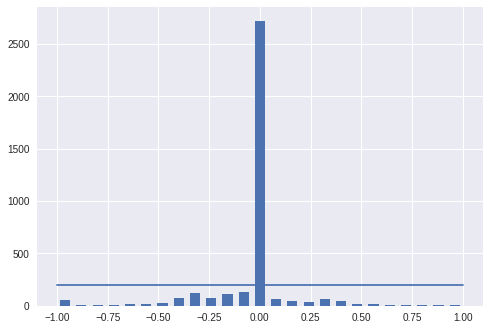

In [0]:
num_bins = 25
samples_per_bin= 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist , width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin , samples_per_bin))

total data: 3698
removed: 2520
remaining 1178


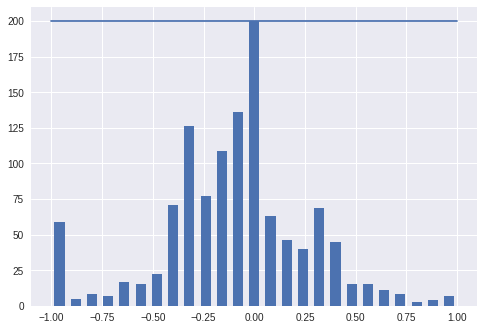

In [0]:
print ('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
    
print ("removed:", len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining', len(data))
hist , _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist , width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin , samples_per_bin))

In [0]:
print(data.iloc[1])

center      center_2019_01_09_17_22_47_035.jpg
left        left_2019_01_09_17_22_47_035.jpg  
right       right_2019_01_09_17_22_47_035.jpg 
steering   -0.292077                          
throttle    1                                 
reverse     0                                 
speed       5.49242                           
Name: 24, dtype: object


In [0]:
def load_image_steering(datadir, df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths , steerings

image_paths , steerings = load_image_steering(datadir +'/IMG' , data)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print ('Training samples : {}\nValidation samples: {}'.format(len(X_train), len(X_valid)))

Training samples : 942
Validation samples: 236


Text(0.5, 1.0, 'Validation set')

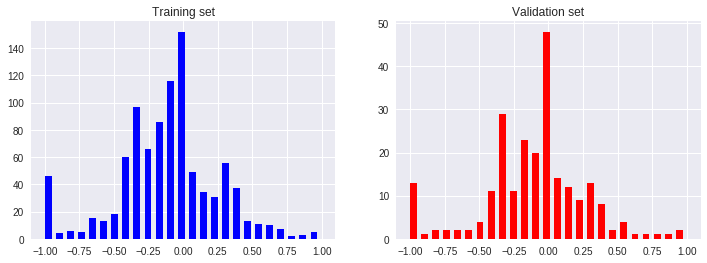

In [0]:
fig, axis = plt.subplots(1,2 , figsize=(12,4))
axis[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axis[0].set_title('Training set')
axis[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axis[1].set_title('Validation set')

In [0]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
  

Text(0.5, 1.0, 'Zoomed image')

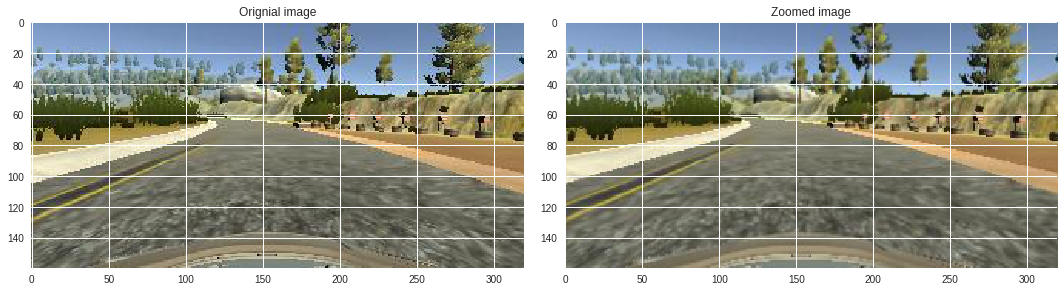

In [0]:
image = image_paths[np.random.randint(1,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Orignial image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed image')

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent= { "x" : (-0.1, 0.1), "y" : (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned image')

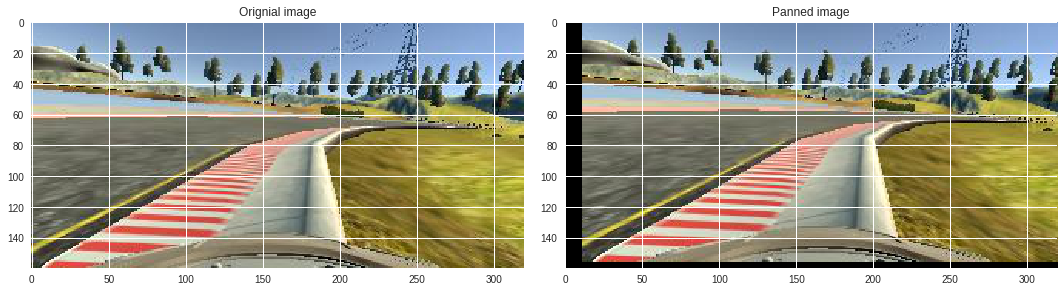

In [0]:
image = image_paths[np.random.randint(1,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Orignial image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned image')

In [0]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2 , 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness altered image')

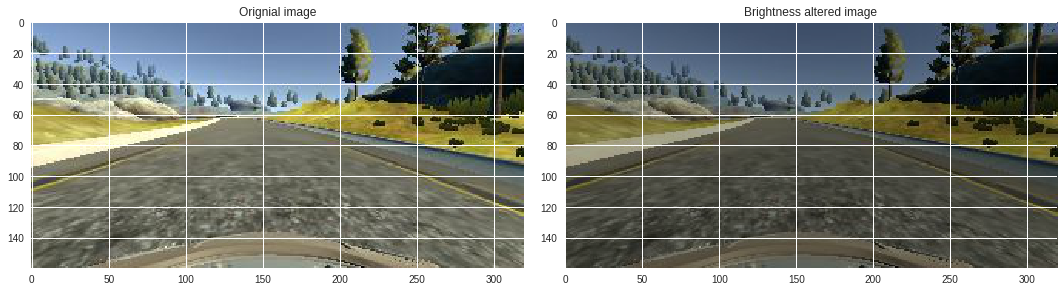

In [0]:
image = image_paths[np.random.randint(1,1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Orignial image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image')

In [0]:
def img_random_flip(image, steering_angle ):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle
  #return image

Text(0.5, 1.0, 'flipped imageSteering angle:-0.3888054')

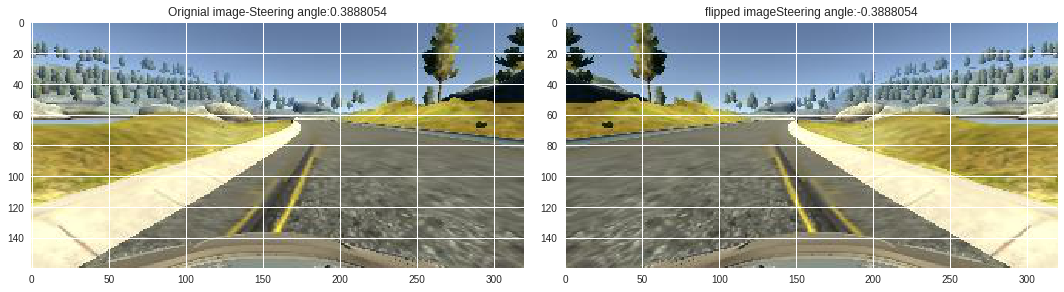

In [0]:
random_index = np.random.randint(1,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)

flipped_image , flipped_steering_angle  = img_random_flip(original_image, steering_angle)


fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Orignial image-' + 'Steering angle:' + str(steering_angle) )
axs[1].imshow(flipped_image)
axs[1].set_title('flipped image'  + 'Steering angle:' + str(flipped_steering_angle))

In [0]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image , steering_angle  = img_random_flip(image, steering_angle)
  return image , steering_angle



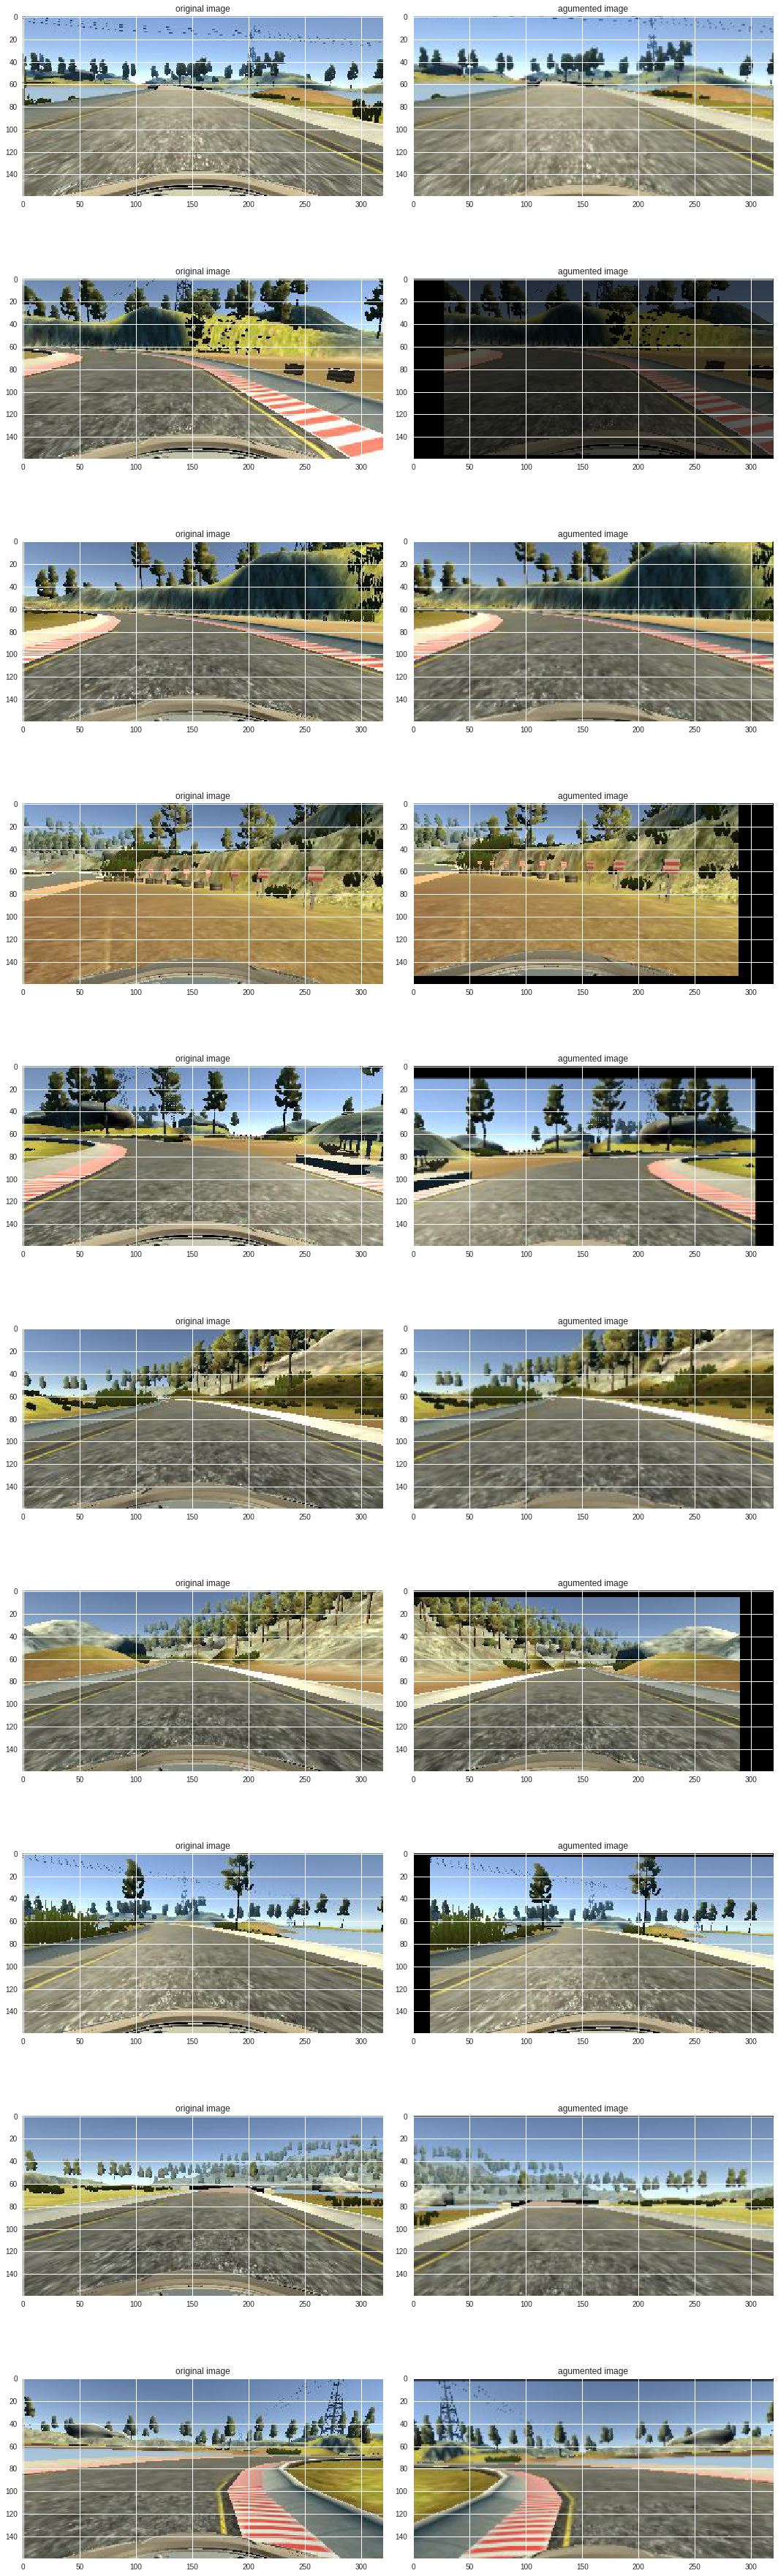

In [0]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  original_image = mpimg.imread(random_image)
  agumented_image, steering = random_augment(random_image, random_steering )
  
  axs[i][0].imshow(original_image)
  axs[i][0].set_title('original image')
  axs[i][1].imshow(agumented_image)
  axs[i][1].set_title('agumented image')
  
  
  

In [0]:
def image_preprocessing(img):
  #img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img ,(200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'preprocessed Image')

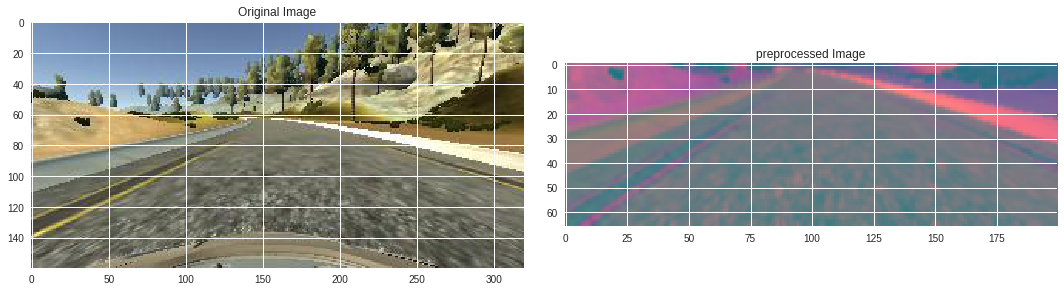

In [0]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = image_preprocessing(original_image)

fig, axs = plt.subplots(1,2 , figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed Image')


In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = image_preprocessing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation image')

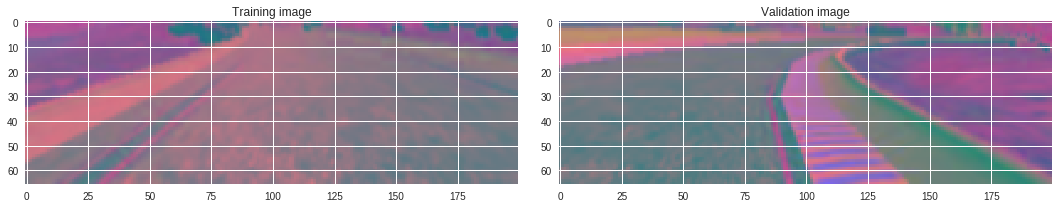

In [0]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training image')
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation image')

In [0]:
#X_train = np.array(list(map(image_preprocessing , X_train)))
#X_valid = np.array(list(map(image_preprocessing , X_valid)))

In [0]:
#plt.imshow(X_train[np.random.randint(0, len(X_train) - 1)])
#plt.axis('off')
#print(X_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,5,5, subsample=(2,2), input_shape=(66,200,3), activation='elu'))
  model.add(Convolution2D(36,5,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(48,5,5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
# model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
# model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
# model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
# model.add(Dropout(0.5))
  model.add(Dense(1))
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [0]:
model = nvidia_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [0]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 166s 554ms/step - loss: 0.1434 - val_loss: 0.1105
Epoch 2/10
300/300 [==============================] - 161s 537ms/step - loss: 0.1179 - val_loss: 0.1168
Epoch 3/10
300/300 [==============================] - 161s 536ms/step - loss: 0.1037 - val_loss: 0.0894
Epoch 4/10
300/300 [==============================] - 161s 537ms/step - loss: 0.0792 - val_loss: 0.0626
Epoch 5/10
300/300 [==============================] - 161s 538ms/step - loss: 0.0888 - val_loss: 0.0798
Epoch 6/10
300/300 [==============================] - 161s 537ms/step - loss: 0.0661 - val_loss: 0.0580
Epoch 7/10
 69/300 [=====>........................] - ETA: 1:22 - loss: 0.0592

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel("epochs")

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')